In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os 
import tensorflow as tf
import random

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# setting seed for reproducible results
def set_seed(seed_value=42):
    os.environ['PYTHONHASHSEED']=str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
#     tf.random.uniform([1], seed=seed_value)

In [5]:
set_seed()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import ELU
from tensorflow.keras.backend import sqrt as Ksqrt
from tensorflow.keras.backend import mean as Kmean
from tensorflow.keras.backend import square as Ksquare
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

In [7]:
df = pd.read_csv('insurance.csv')

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [9]:
dfe = df.copy()

dfe['sex'] = enc.fit_transform(df['sex'])
dfe['smoker'] = enc.fit_transform(df['smoker'])
dfe['region'] = enc.fit_transform(df['region'])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfe.drop('charges', axis=1), dfe['charges'],\
                                                    test_size=0.2, random_state=42)

In [11]:
def root_mean_squared_error(y_true, y_pred):
        return Ksqrt(Kmean(Ksquare(y_pred - y_true))) 

In [12]:
def check_min_max(y_pred):
    d = pd.DataFrame({'Actual' : [np.max(y_test), np.min(y_test)], 'Predicted' : [np.max(y_pred), np.min(y_pred)]},\
                     ['Maximum Values', 'Minimum Values'])
    print(d.head())

In [13]:
def epoc_plots(hist):
    fig, axs = plt.subplots(3, 1, figsize=(15,18))
    #1st plot
    axs[0].plot(hist.history['loss'], label='loss')
    axs[0].plot(hist.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('Epocs', fontsize=12)
    axs[0].set_ylabel('Root Mean Squared Error (loss)', fontsize=12)
    axs[0].legend(loc='upper right', fontsize=12)

    #2nd plot 
    axs[1].plot(hist.history['mae'], label='mae')
    axs[1].plot(hist.history['val_mae'], label='val_mae')
    axs[1].set_xlabel('Epocs', fontsize=12)
    axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
    axs[1].legend(loc='upper right', fontsize=12)

    #3rd plot 
    axs[2].plot(hist.history['mse'], label='mse')
    axs[2].plot(hist.history['val_mse'], label='val_mse')
    axs[2].set_xlabel('Epocs', fontsize=12)
    axs[2].set_ylabel('Mean Squared Error', fontsize=12)
    axs[2].legend(loc='upper right', fontsize=12)

    plt.tight_layout()

In [14]:
def regression_plots(y_pred, model):
    fig, axs = plt.subplots(2, 1, figsize=(15,12))
    #1st plot
    sns.scatterplot(model.predict(X_train).reshape(-1), y_train, ax=axs[0])
    axs[0].set_xlabel('Predicted Values', fontsize=12)
    axs[0].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(model.predict(X_train).reshape(-1), model.predict(X_train).reshape(-1), color='red', ax=axs[0])
    axs[0].set_title('Predictions for train data', fontsize=15)

    #2nd plot 
    sns.scatterplot(y_pred.reshape(-1), y_test, ax=axs[1])
    axs[1].set_xlabel('Predicted Values', fontsize=12)
    axs[1].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(y_pred.reshape(-1), y_pred.reshape(-1), color='red', ax=axs[1])
    axs[1].set_title('Predictions for test data', fontsize=15)

    plt.tight_layout()

In [15]:
# in this notebook the aim is to get reproducible results 
# I'll retry trying some batch norm models from the last notebook
# with a set seed

# I'm retraining model59 (r2 = 0.87) as model61 with setseed

In [16]:
set_seed()

In [17]:
# param count: 11,169 (+448)
model61 = Sequential() 

model61.add(Dense(32, input_dim=6))
model61.add(BatchNormalization())
model61.add(Activation(ELU()))


for _ in range(3):
    model61.add(Dense(64))
    model61.add(BatchNormalization())
    model61.add(Activation(ELU()))

model61.add(Dense(1, activation='relu'))

model61.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [18]:
history61 = model61.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 0s 11ms/step - loss: 17891.2188 - mse: 325295168.0000 - mae: 13513.9355 - val_loss: 17498.1270 - val_mse: 307018144.0000 - val_mae: 12532.6123
Epoch 2/300
14/14 [==============================] - 0s 1ms/step - loss: 17934.5059 - mse: 324989536.0000 - mae: 13508.9443 - val_loss: 17547.3477 - val_mse: 308748256.0000 - val_mae: 12597.6670
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17979.9180 - mse: 324543680.0000 - mae: 13501.3135 - val_loss: 17427.6406 - val_mse: 304552960.0000 - val_mae: 12460.6973
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17921.2832 - mse: 323996352.0000 - mae: 13490.4385 - val_loss: 17385.5918 - val_mse: 303086656.0000 - val_mae: 12418.5420
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17848.8320 - mse: 323307488.0000 - mae: 13476.5186 - val_loss: 17355.6875 - val_mse: 302042880.0000 - val_mae: 12405.4346
Epoch 6/300
14/14 [=====

Epoch 43/300
14/14 [==============================] - 0s 2ms/step - loss: 14114.1631 - mse: 200761408.0000 - mae: 10541.0586 - val_loss: 14314.7344 - val_mse: 205744128.0000 - val_mae: 8525.8955
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 13881.4414 - mse: 195912000.0000 - mae: 10416.1035 - val_loss: 13830.4883 - val_mse: 191767280.0000 - val_mae: 9325.8408
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 13608.6113 - mse: 191583984.0000 - mae: 10298.3086 - val_loss: 10909.1211 - val_mse: 119275528.0000 - val_mae: 7484.5327
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 13535.3477 - mse: 185986912.0000 - mae: 10126.0752 - val_loss: 10513.7695 - val_mse: 110791448.0000 - val_mae: 7398.8540
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 13306.7803 - mse: 181795088.0000 - mae: 9959.2979 - val_loss: 11004.4844 - val_mse: 121394816.0000 - val_mae: 7916.1050
Epoch 48/300
14/14 [======

Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 5807.5674 - mse: 35665352.0000 - mae: 3623.3574 - val_loss: 5161.4639 - val_mse: 26904124.0000 - val_mae: 3756.7244
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 5819.5825 - mse: 35336172.0000 - mae: 3520.5210 - val_loss: 4903.5718 - val_mse: 24384490.0000 - val_mae: 2740.0525
Epoch 88/300
14/14 [==============================] - 0s 1ms/step - loss: 5626.2686 - mse: 32940142.0000 - mae: 3201.7732 - val_loss: 5353.5869 - val_mse: 28802860.0000 - val_mae: 4200.6597
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 5315.4077 - mse: 30469018.0000 - mae: 3169.4810 - val_loss: 5210.6924 - val_mse: 27318238.0000 - val_mae: 3797.9102
Epoch 90/300
14/14 [==============================] - 0s 2ms/step - loss: 5587.7510 - mse: 33047032.0000 - mae: 3375.1553 - val_loss: 5237.4976 - val_mse: 27746476.0000 - val_mae: 2845.7095
Epoch 91/300
14/14 [==============================

r2 score =  0.852979706665777 

                     Actual    Predicted
Maximum Values  63770.42801  45857.59375
Minimum Values   1131.50660      0.00000


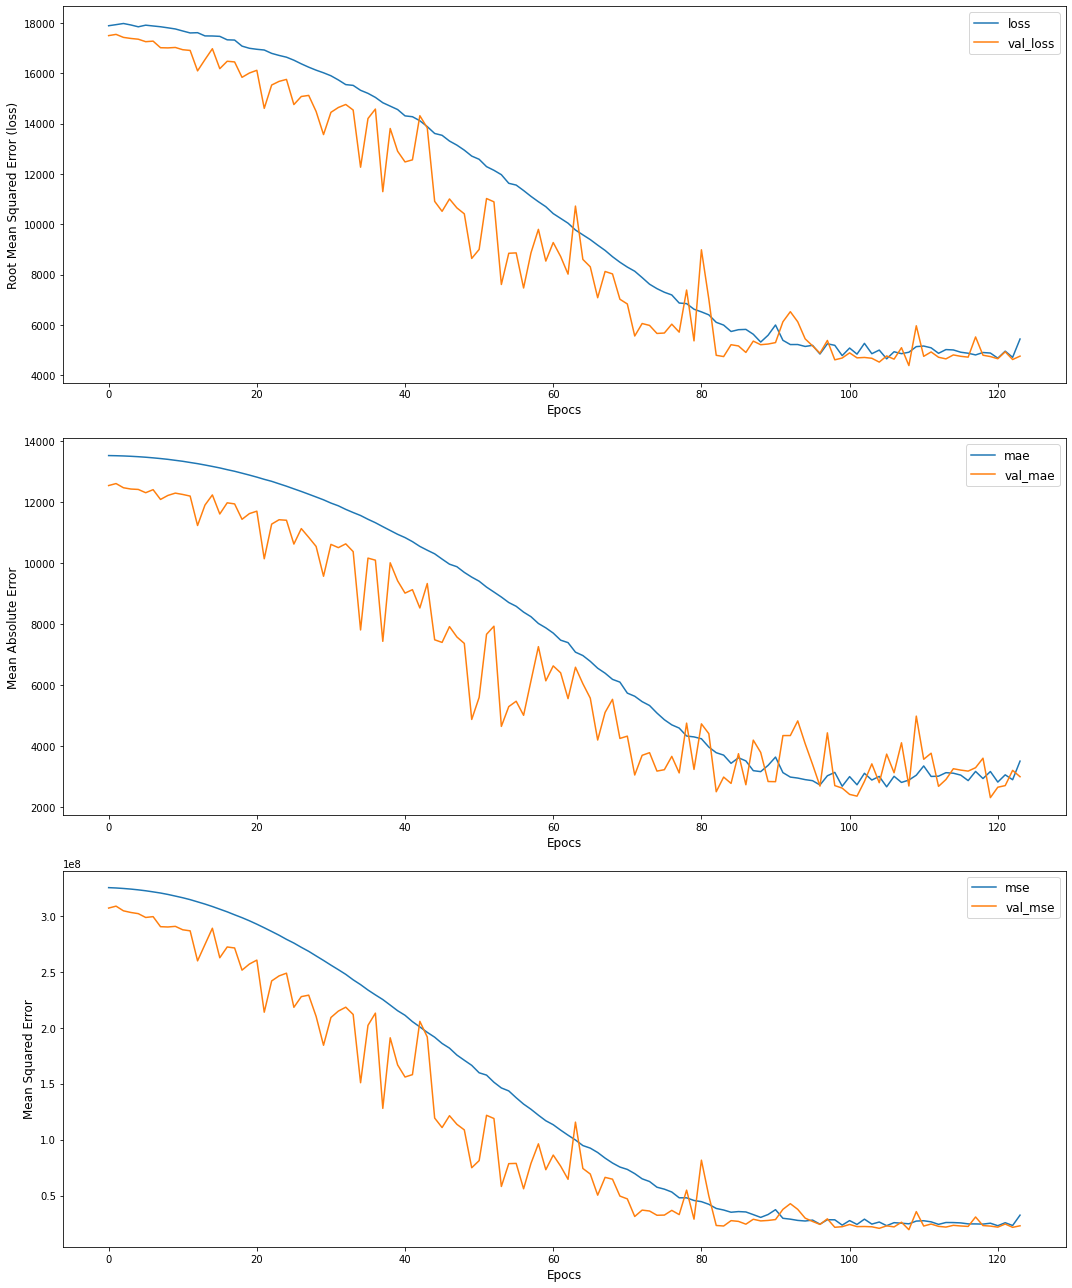

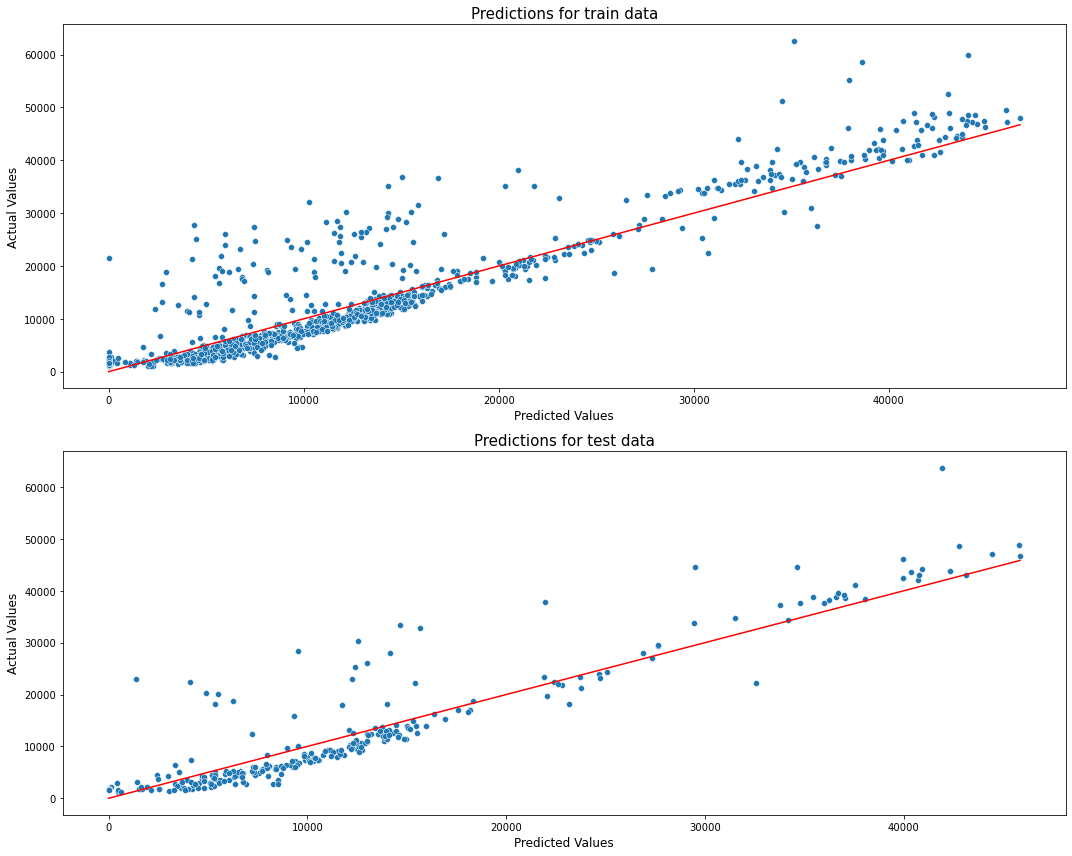

In [19]:
epoc_plots(history61)

y_pred61 = model61.predict(X_test)
print('r2 score = ', r2_score(y_test, y_pred61), '\n')

regression_plots(y_pred61, model61)

check_min_max(y_pred61)

In [20]:
# with this seed, the r2score decreases to 0.85
# now I do not know whether this is the correct practice or not, 
# but I was playing with this set_seed, and retraining the same model again with 
# the same seed was giving different (and sometimes much better) results
# but I'm not going to rerun the model because I personally don't think that would be wise

# ok, let me try some more archs to get a better r2 score

In [21]:
set_seed()

In [22]:
# param count: 5,921 (+384)
model62 = Sequential() 

model62.add(Dense(32, input_dim=6))
model62.add(BatchNormalization())
model62.add(Activation(ELU()))


for _ in range(5):
    model62.add(Dense(32))
    model62.add(BatchNormalization())
    model62.add(Activation(ELU()))

model62.add(Dense(1, activation='relu'))

model62.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [23]:
history62 = model62.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 0s 11ms/step - loss: 17892.2754 - mse: 325332960.0000 - mae: 13515.9932 - val_loss: 17575.8184 - val_mse: 309747872.0000 - val_mae: 12631.7520
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 17939.2266 - mse: 325159552.0000 - mae: 13512.8809 - val_loss: 17537.2617 - val_mse: 308392576.0000 - val_mae: 12583.0469
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17991.2129 - mse: 324948032.0000 - mae: 13508.8320 - val_loss: 17494.5098 - val_mse: 306893856.0000 - val_mae: 12528.0000
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17940.3301 - mse: 324680032.0000 - mae: 13503.5479 - val_loss: 17482.3750 - val_mse: 306467840.0000 - val_mae: 12520.7393
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17877.7012 - mse: 324342560.0000 - mae: 13496.5527 - val_loss: 17495.4648 - val_mse: 306924736.0000 - val_mae: 12546.9111
Epoch 6/300
14/14 [=====

Epoch 43/300
14/14 [==============================] - 0s 2ms/step - loss: 16101.6963 - mse: 260814144.0000 - mae: 12062.0576 - val_loss: 14805.8701 - val_mse: 219679136.0000 - val_mae: 10956.8945
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 15958.1152 - mse: 257957216.0000 - mae: 12001.6689 - val_loss: 14132.4424 - val_mse: 200176080.0000 - val_mae: 10369.3965
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 15773.5605 - mse: 255228608.0000 - mae: 11947.1826 - val_loss: 12372.5889 - val_mse: 153462496.0000 - val_mae: 8402.1846
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 15785.7012 - mse: 251966416.0000 - mae: 11863.6709 - val_loss: 12697.3477 - val_mse: 161574928.0000 - val_mae: 8878.0576
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 15634.4688 - mse: 249430416.0000 - mae: 11786.8789 - val_loss: 13490.9229 - val_mse: 182435392.0000 - val_mae: 9536.3623
Epoch 48/300
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 11027.6602 - mse: 124268136.0000 - mae: 8138.6201 - val_loss: 9474.5273 - val_mse: 90028632.0000 - val_mae: 6766.3560
Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 10920.2568 - mse: 122376880.0000 - mae: 8123.5664 - val_loss: 8056.5366 - val_mse: 65097312.0000 - val_mae: 5358.7358
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 10809.7314 - mse: 119629144.0000 - mae: 7853.8135 - val_loss: 12474.4717 - val_mse: 156209120.0000 - val_mae: 8303.0693
Epoch 88/300
14/14 [==============================] - 0s 2ms/step - loss: 10640.2930 - mse: 115979040.0000 - mae: 7827.2358 - val_loss: 8192.9502 - val_mse: 67270856.0000 - val_mae: 4992.7349
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 10436.0195 - mse: 111959048.0000 - mae: 7703.6494 - val_loss: 8030.7065 - val_mse: 64676348.0000 - val_mae: 4821.2100
Epoch 90/300
14/14 [==============================]

Epoch 128/300
14/14 [==============================] - 0s 2ms/step - loss: 5624.7554 - mse: 33021718.0000 - mae: 3428.5776 - val_loss: 4772.7661 - val_mse: 22892458.0000 - val_mae: 2737.0833
Epoch 129/300
14/14 [==============================] - 0s 2ms/step - loss: 5551.3784 - mse: 32255206.0000 - mae: 3289.6130 - val_loss: 4914.0625 - val_mse: 24246384.0000 - val_mae: 3073.1943
Epoch 130/300
14/14 [==============================] - 0s 2ms/step - loss: 5442.2407 - mse: 32682788.0000 - mae: 3288.1294 - val_loss: 5600.7407 - val_mse: 31557482.0000 - val_mae: 3137.9802
Epoch 131/300
14/14 [==============================] - 0s 2ms/step - loss: 5518.6401 - mse: 32421022.0000 - mae: 3270.2964 - val_loss: 4970.6240 - val_mse: 24901878.0000 - val_mae: 3038.4951
Epoch 132/300
14/14 [==============================] - 0s 2ms/step - loss: 5158.4429 - mse: 28229202.0000 - mae: 2969.6814 - val_loss: 4891.2671 - val_mse: 24044180.0000 - val_mae: 2573.2095
Epoch 133/300
14/14 [========================

r2 score =  0.8685604396859385 

                     Actual     Predicted
Maximum Values  63770.42801  47994.902344
Minimum Values   1131.50660      0.000000


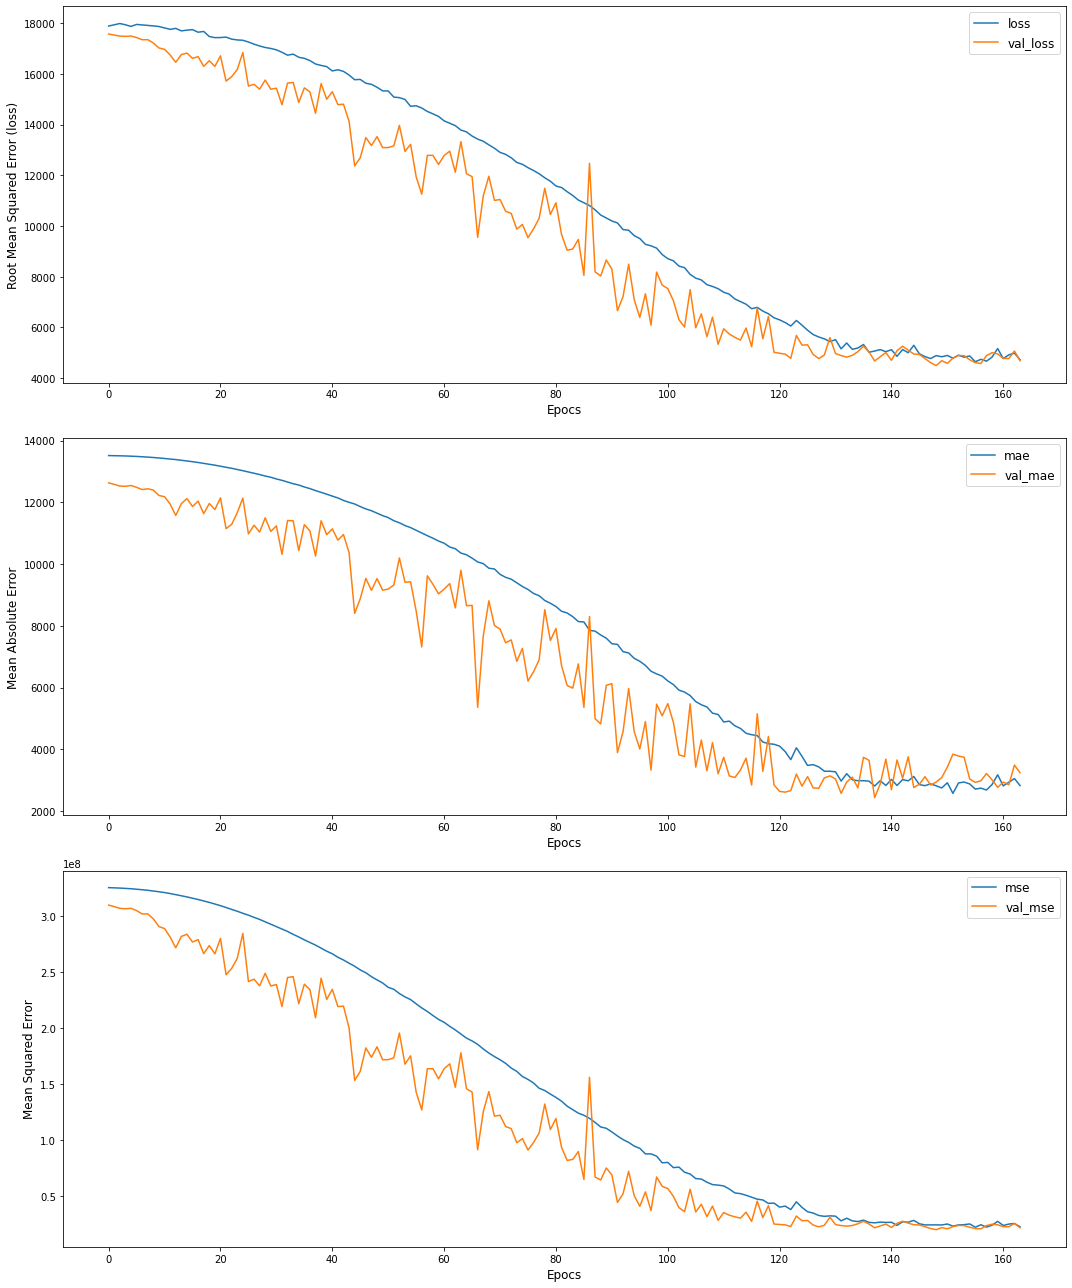

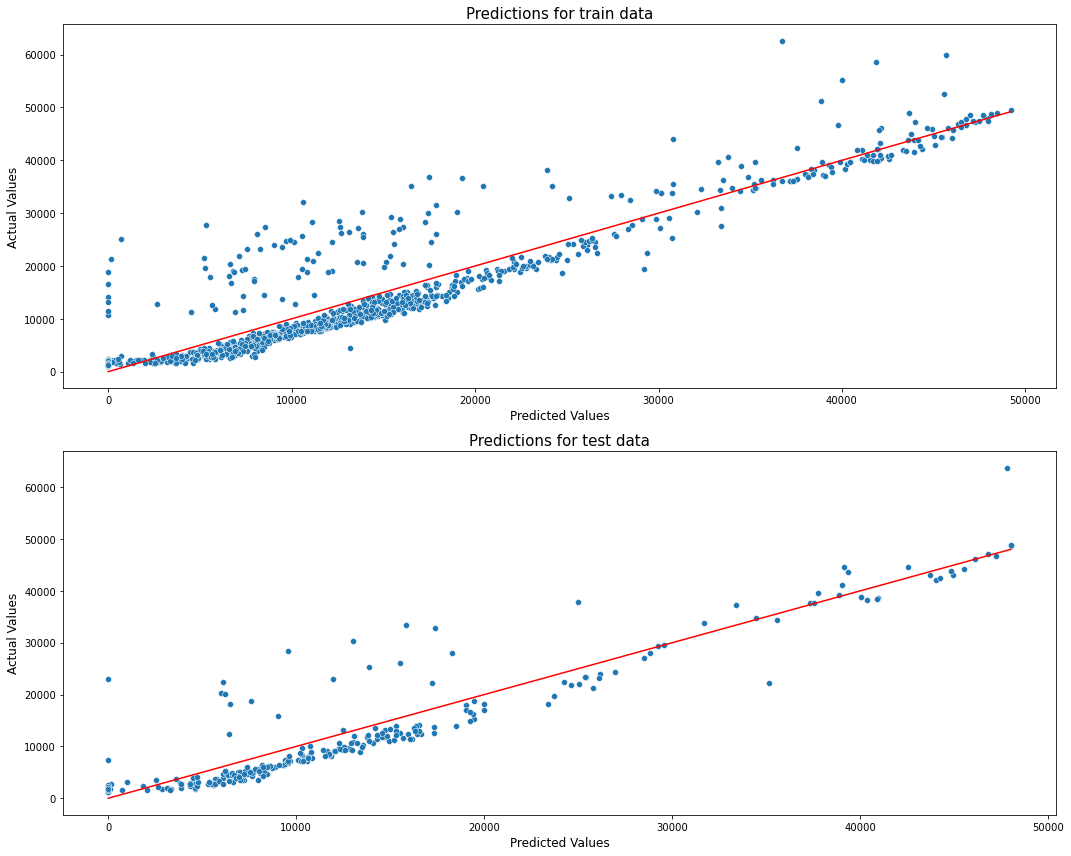

In [24]:
epoc_plots(history62)

y_pred62 = model62.predict(X_test)
print('r2 score = ', r2_score(y_test, y_pred62), '\n')

regression_plots(y_pred62, model62)

check_min_max(y_pred62)

In [25]:
# hmm, less params and slightly higher r2
# also, I'm thinking of increasing the patience of the models
# let me retrain the same model with that (also more layers)

In [26]:
set_seed()

In [27]:
# param count: 8,161 (+512)
model63 = Sequential() 

model63.add(Dense(32, input_dim=6))
model63.add(BatchNormalization())
model63.add(Activation(ELU()))


for _ in range(7):
    model63.add(Dense(32))
    model63.add(BatchNormalization())
    model63.add(Activation(ELU()))

model63.add(Dense(1, activation='relu'))

model63.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [28]:
history63 = model63.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=16))

Epoch 1/300
14/14 [==============================] - 0s 13ms/step - loss: 17891.9434 - mse: 325320768.0000 - mae: 13515.5615 - val_loss: 17555.3242 - val_mse: 309027168.0000 - val_mae: 12604.4355
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 17938.2656 - mse: 325124704.0000 - mae: 13512.2900 - val_loss: 17479.9512 - val_mse: 306383872.0000 - val_mae: 12507.7871
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17989.6445 - mse: 324891616.0000 - mae: 13508.2539 - val_loss: 17435.4062 - val_mse: 304827328.0000 - val_mae: 12457.9287
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17937.6465 - mse: 324583840.0000 - mae: 13502.0039 - val_loss: 17426.8711 - val_mse: 304523968.0000 - val_mae: 12462.1172
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17874.1504 - mse: 324214944.0000 - mae: 13494.5107 - val_loss: 17413.9219 - val_mse: 304071360.0000 - val_mae: 12455.6680
Epoch 6/300
14/14 [=====

Epoch 43/300
14/14 [==============================] - 0s 2ms/step - loss: 15752.7666 - mse: 249700160.0000 - mae: 11814.7139 - val_loss: 15782.8496 - val_mse: 249989504.0000 - val_mae: 10957.6172
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 15594.1426 - mse: 246478560.0000 - mae: 11743.7012 - val_loss: 13783.2539 - val_mse: 190319776.0000 - val_mae: 10310.7656
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 15394.4785 - mse: 243391472.0000 - mae: 11667.9414 - val_loss: 11110.6348 - val_mse: 123706752.0000 - val_mae: 7773.2026
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 15398.2920 - mse: 239873168.0000 - mae: 11580.8311 - val_loss: 9527.6953 - val_mse: 90924288.0000 - val_mae: 6575.3076
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 15229.9688 - mse: 236888848.0000 - mae: 11489.0615 - val_loss: 12169.3252 - val_mse: 148408880.0000 - val_mae: 9204.2520
Epoch 48/300
14/14 [=====

14/14 [==============================] - 0s 2ms/step - loss: 9844.8740 - mse: 99511840.0000 - mae: 7196.9443 - val_loss: 5877.8359 - val_mse: 34743996.0000 - val_mae: 3531.5002
Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 9732.7148 - mse: 97785088.0000 - mae: 7121.0146 - val_loss: 6220.1499 - val_mse: 38922300.0000 - val_mae: 4111.6655
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 9607.2871 - mse: 94744376.0000 - mae: 6848.6240 - val_loss: 6386.3267 - val_mse: 41162112.0000 - val_mae: 4035.4521
Epoch 88/300
14/14 [==============================] - 0s 2ms/step - loss: 9399.5127 - mse: 90975968.0000 - mae: 6755.3354 - val_loss: 5508.4756 - val_mse: 30536298.0000 - val_mae: 3425.6841
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 9159.8486 - mse: 87036504.0000 - mae: 6699.0039 - val_loss: 6715.9463 - val_mse: 45406144.0000 - val_mae: 4403.1777
Epoch 90/300
14/14 [==============================] - 0s 2ms/st

14/14 [==============================] - 0s 2ms/step - loss: 5064.4902 - mse: 26644638.0000 - mae: 2983.0684 - val_loss: 5708.8462 - val_mse: 32730268.0000 - val_mae: 4888.3145


r2 score =  0.7592390085183868 

                     Actual     Predicted
Maximum Values  63770.42801  55438.085938
Minimum Values   1131.50660      0.000000


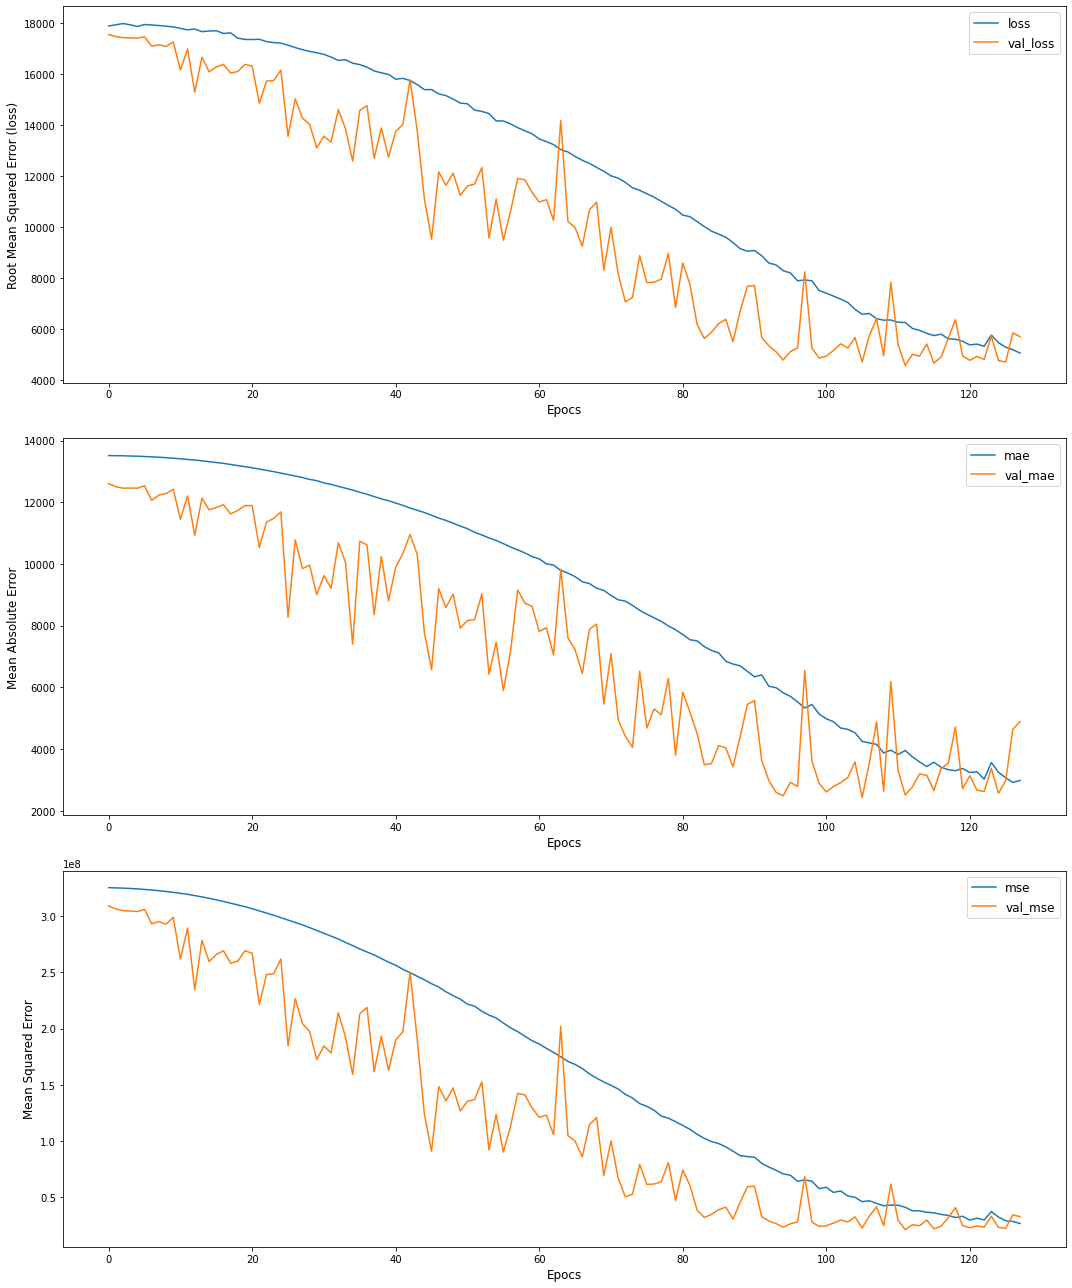

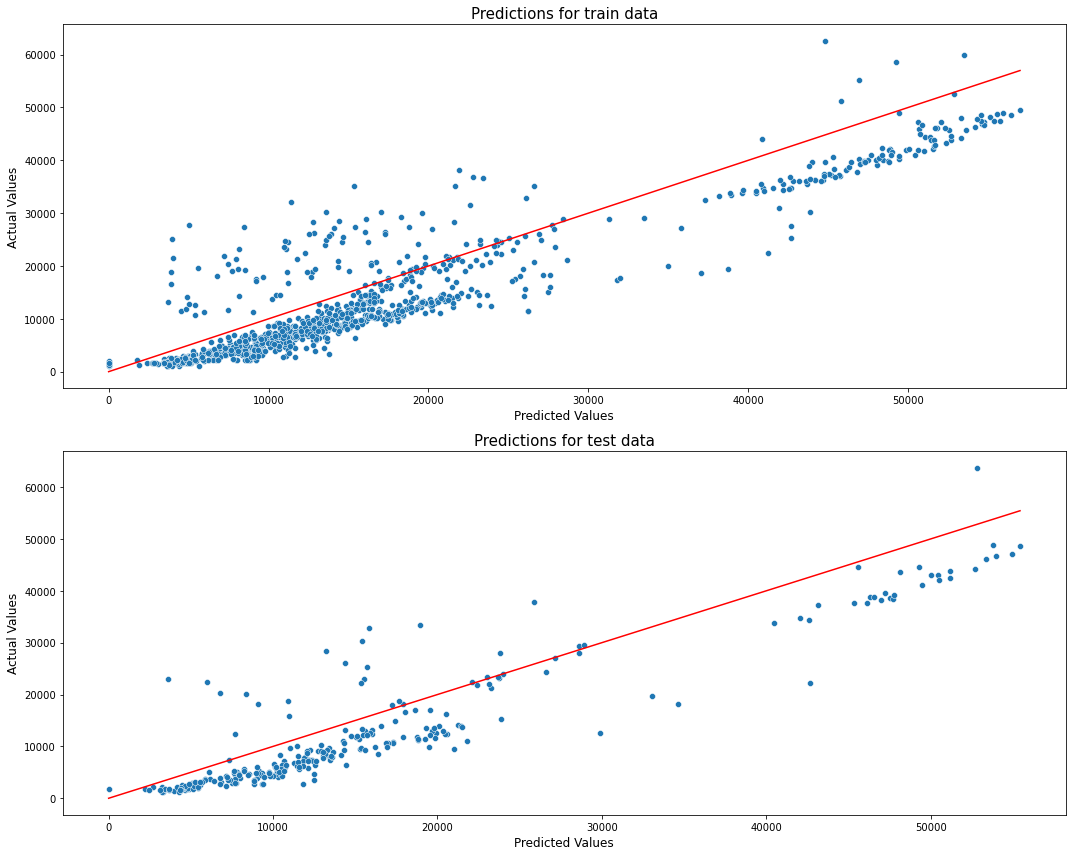

In [29]:
epoc_plots(history63)

y_pred63 = model63.predict(X_test)
print('r2 score = ', r2_score(y_test, y_pred63), '\n')

regression_plots(y_pred63, model63)

check_min_max(y_pred63)

In [30]:
# more params, and lower r2 score
# but the max value is higher 

In [31]:
set_seed()

In [32]:
# param count: 13,505 (+512)
model64 = Sequential() 

model64.add(Dense(64, input_dim=6))
model64.add(BatchNormalization())
model64.add(Activation(ELU()))


for _ in range(3):
    model64.add(Dense(64))
    model64.add(BatchNormalization())
    model64.add(Activation(ELU()))

model64.add(Dense(1, activation='relu'))

model64.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [33]:
history64 = model64.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=16))

Epoch 1/300
14/14 [==============================] - 0s 10ms/step - loss: 17891.3281 - mse: 325298112.0000 - mae: 13514.0830 - val_loss: 17518.1699 - val_mse: 307719200.0000 - val_mae: 12562.9531
Epoch 2/300
14/14 [==============================] - 0s 1ms/step - loss: 17933.6113 - mse: 324956960.0000 - mae: 13508.9502 - val_loss: 17473.0039 - val_mse: 306137280.0000 - val_mae: 12512.7930
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17979.4785 - mse: 324527808.0000 - mae: 13501.3213 - val_loss: 17331.7617 - val_mse: 301212512.0000 - val_mae: 12348.1006
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17920.6445 - mse: 323973440.0000 - mae: 13490.2344 - val_loss: 17406.4648 - val_mse: 303806976.0000 - val_mae: 12463.0234
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17848.2402 - mse: 323286560.0000 - mae: 13476.0234 - val_loss: 17295.7402 - val_mse: 299953472.0000 - val_mae: 12369.9463
Epoch 6/300
14/14 [=====

Epoch 43/300
14/14 [==============================] - 0s 2ms/step - loss: 13999.2451 - mse: 197511792.0000 - mae: 10464.8047 - val_loss: 14076.3926 - val_mse: 198715520.0000 - val_mae: 9886.0117
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 13770.8740 - mse: 192858736.0000 - mae: 10319.4561 - val_loss: 13389.6807 - val_mse: 179639616.0000 - val_mae: 9743.7852
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 13496.2217 - mse: 188487952.0000 - mae: 10205.8594 - val_loss: 10166.9521 - val_mse: 103608696.0000 - val_mae: 7010.5337
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 13422.5479 - mse: 182932112.0000 - mae: 10023.0068 - val_loss: 9596.8066 - val_mse: 92340680.0000 - val_mae: 6902.2510
Epoch 47/300
14/14 [==============================] - 0s 1ms/step - loss: 13187.6504 - mse: 178637008.0000 - mae: 9861.0791 - val_loss: 10172.3857 - val_mse: 103747880.0000 - val_mae: 7695.4365
Epoch 48/300
14/14 [========

Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 5630.5293 - mse: 33618644.0000 - mae: 3523.2603 - val_loss: 11107.6914 - val_mse: 123738400.0000 - val_mae: 9439.2988
Epoch 87/300
14/14 [==============================] - 0s 1ms/step - loss: 5656.6616 - mse: 33451174.0000 - mae: 3429.1055 - val_loss: 4991.8540 - val_mse: 25051558.0000 - val_mae: 3094.9409
Epoch 88/300
14/14 [==============================] - 0s 1ms/step - loss: 5472.2896 - mse: 31172366.0000 - mae: 3104.1057 - val_loss: 4969.7554 - val_mse: 24815408.0000 - val_mae: 3219.4661
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 5163.1260 - mse: 28860814.0000 - mae: 3091.4956 - val_loss: 5347.1646 - val_mse: 28724970.0000 - val_mae: 3937.0107
Epoch 90/300
14/14 [==============================] - 0s 2ms/step - loss: 5485.1641 - mse: 31658902.0000 - mae: 3326.0920 - val_loss: 5322.7642 - val_mse: 28613288.0000 - val_mae: 3053.8865
Epoch 91/300
14/14 [============================

r2 score =  0.7451469946994914 

                     Actual     Predicted
Maximum Values  63770.42801  56398.613281
Minimum Values   1131.50660      0.000000


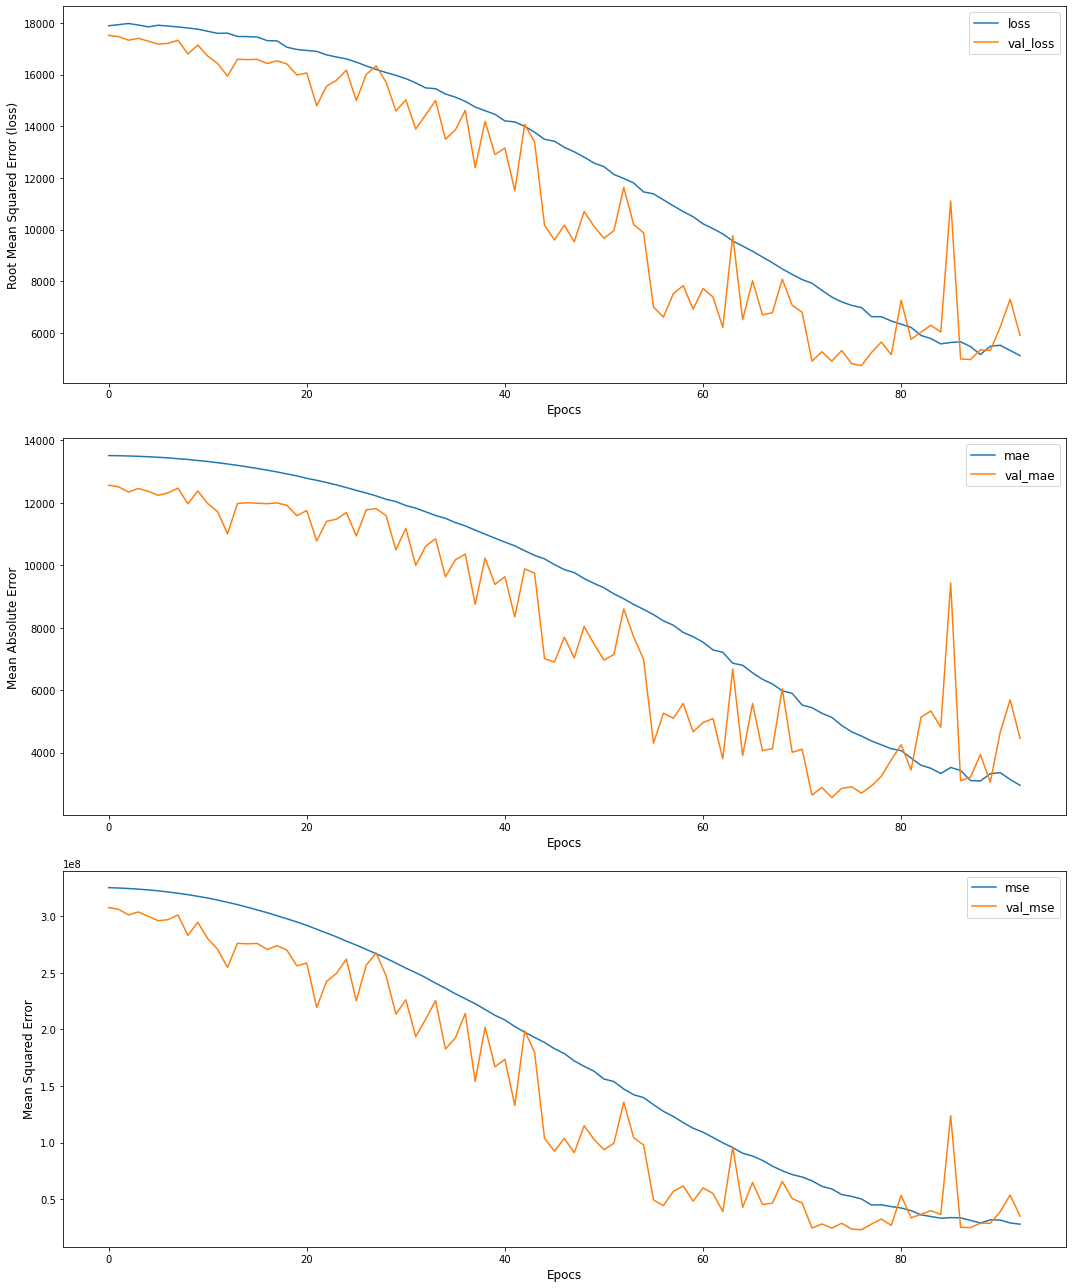

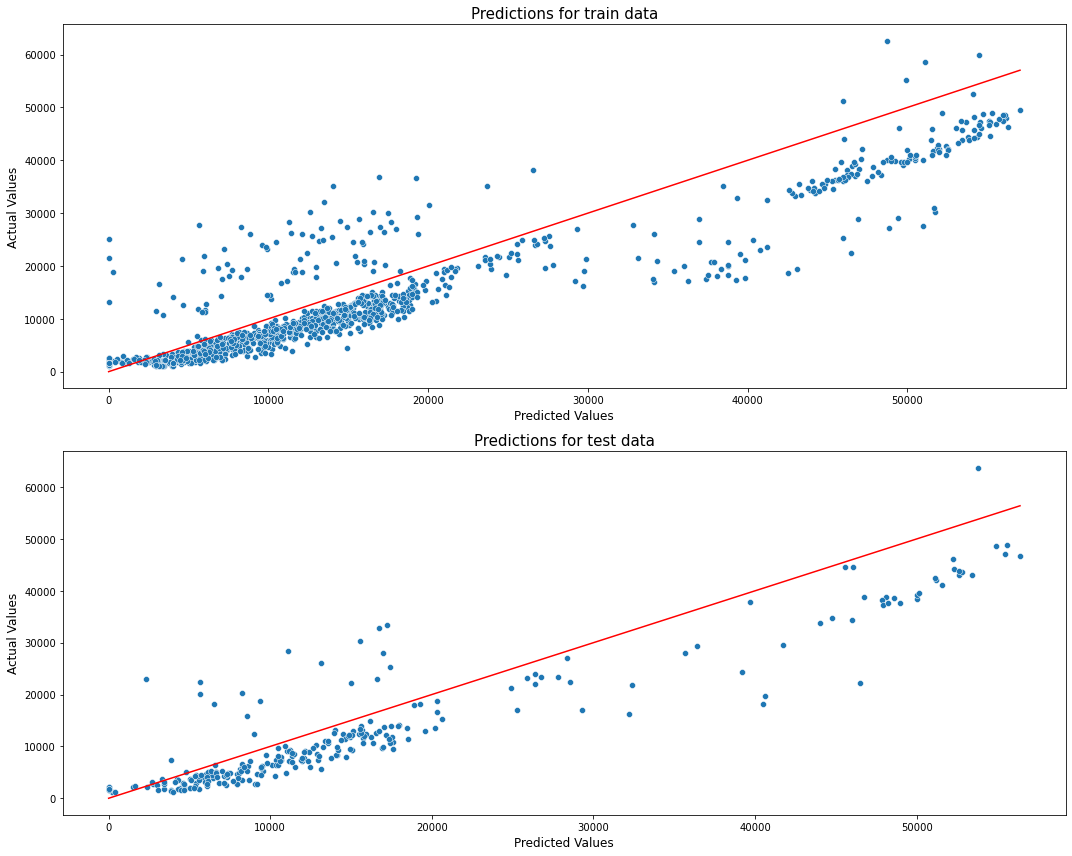

In [34]:
epoc_plots(history64)

y_pred64 = model64.predict(X_test)
print('r2 score = ', r2_score(y_test, y_pred64), '\n')

regression_plots(y_pred64, model64)

check_min_max(y_pred64)

In [35]:
# model 61 and 64 are very similar (just the first layer neuron count is different; and patience+1)
# but the r2 score is significantly different (more param has slightly lower r2 score)
# model64's prdictions at the lower value count predicts a more values as 0 whose actual value is much higher (10,000-30,000)
# model61 doesn't do that 

In [36]:
set_seed()

In [37]:
# param count: 9,217 (+384)
model65 = Sequential() 

model65.add(Dense(64, input_dim=6))
model65.add(BatchNormalization())
model65.add(Activation(ELU()))

# model65.add(Dense(32))
# model65.add(BatchNormalization())
# model65.add(Activation(ELU()))

for _ in range(2):
    model65.add(Dense(64))
    model65.add(BatchNormalization())
    model65.add(Activation(ELU()))

model65.add(Dense(1, activation='relu'))

model65.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [38]:
history65 = model65.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=16))

Epoch 1/300
14/14 [==============================] - 0s 9ms/step - loss: 17891.7305 - mse: 325313152.0000 - mae: 13514.4443 - val_loss: 17413.7656 - val_mse: 304066848.0000 - val_mae: 12428.3115
Epoch 2/300
14/14 [==============================] - 0s 1ms/step - loss: 17936.2891 - mse: 325054592.0000 - mae: 13508.6670 - val_loss: 17575.0273 - val_mse: 309718720.0000 - val_mae: 12636.6084
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17980.1992 - mse: 324554496.0000 - mae: 13501.5059 - val_loss: 17513.1406 - val_mse: 307538336.0000 - val_mae: 12577.2568
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17920.9863 - mse: 323984864.0000 - mae: 13490.5713 - val_loss: 17458.2695 - val_mse: 305614272.0000 - val_mae: 12527.8809
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17846.9863 - mse: 323241504.0000 - mae: 13475.8564 - val_loss: 17484.7930 - val_mse: 306538240.0000 - val_mae: 12568.8574
Epoch 6/300
14/14 [======

Epoch 43/300
14/14 [==============================] - 0s 2ms/step - loss: 13873.5947 - mse: 194015232.0000 - mae: 10382.3076 - val_loss: 12762.7100 - val_mse: 163301344.0000 - val_mae: 8780.9658
Epoch 44/300
14/14 [==============================] - 0s 1ms/step - loss: 13643.7285 - mse: 189350240.0000 - mae: 10225.6250 - val_loss: 12201.8076 - val_mse: 149178336.0000 - val_mae: 8857.4678
Epoch 45/300
14/14 [==============================] - 0s 1ms/step - loss: 13363.5586 - mse: 184931600.0000 - mae: 10101.6113 - val_loss: 8561.2256 - val_mse: 73521016.0000 - val_mae: 4914.4819
Epoch 46/300
14/14 [==============================] - 0s 1ms/step - loss: 13281.2773 - mse: 179159952.0000 - mae: 9915.0361 - val_loss: 8422.7305 - val_mse: 71177248.0000 - val_mae: 4661.6885
Epoch 47/300
14/14 [==============================] - 0s 1ms/step - loss: 13037.9248 - mse: 174692336.0000 - mae: 9745.4336 - val_loss: 8829.2920 - val_mse: 78200680.0000 - val_mae: 5634.1406
Epoch 48/300
14/14 [=============

Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 5528.1694 - mse: 32354982.0000 - mae: 3356.7891 - val_loss: 6079.3428 - val_mse: 37112688.0000 - val_mae: 5063.0771
Epoch 87/300
14/14 [==============================] - 0s 1ms/step - loss: 5597.6753 - mse: 32791340.0000 - mae: 3404.5920 - val_loss: 5042.8726 - val_mse: 25519082.0000 - val_mae: 3133.1616
Epoch 88/300
14/14 [==============================] - 0s 1ms/step - loss: 5438.1162 - mse: 30704702.0000 - mae: 3096.9719 - val_loss: 4986.0005 - val_mse: 24971980.0000 - val_mae: 3409.8235
Epoch 89/300
14/14 [==============================] - 0s 1ms/step - loss: 5102.4170 - mse: 28080562.0000 - mae: 2953.3540 - val_loss: 5007.3252 - val_mse: 25165822.0000 - val_mae: 3456.0254
Epoch 90/300
14/14 [==============================] - 0s 2ms/step - loss: 5433.6113 - mse: 31000760.0000 - mae: 3258.1819 - val_loss: 5445.7266 - val_mse: 30009096.0000 - val_mae: 3122.5400
Epoch 91/300
14/14 [==============================

r2 score =  0.8159592241794312 

                     Actual     Predicted
Maximum Values  63770.42801  53046.121094
Minimum Values   1131.50660      0.000000


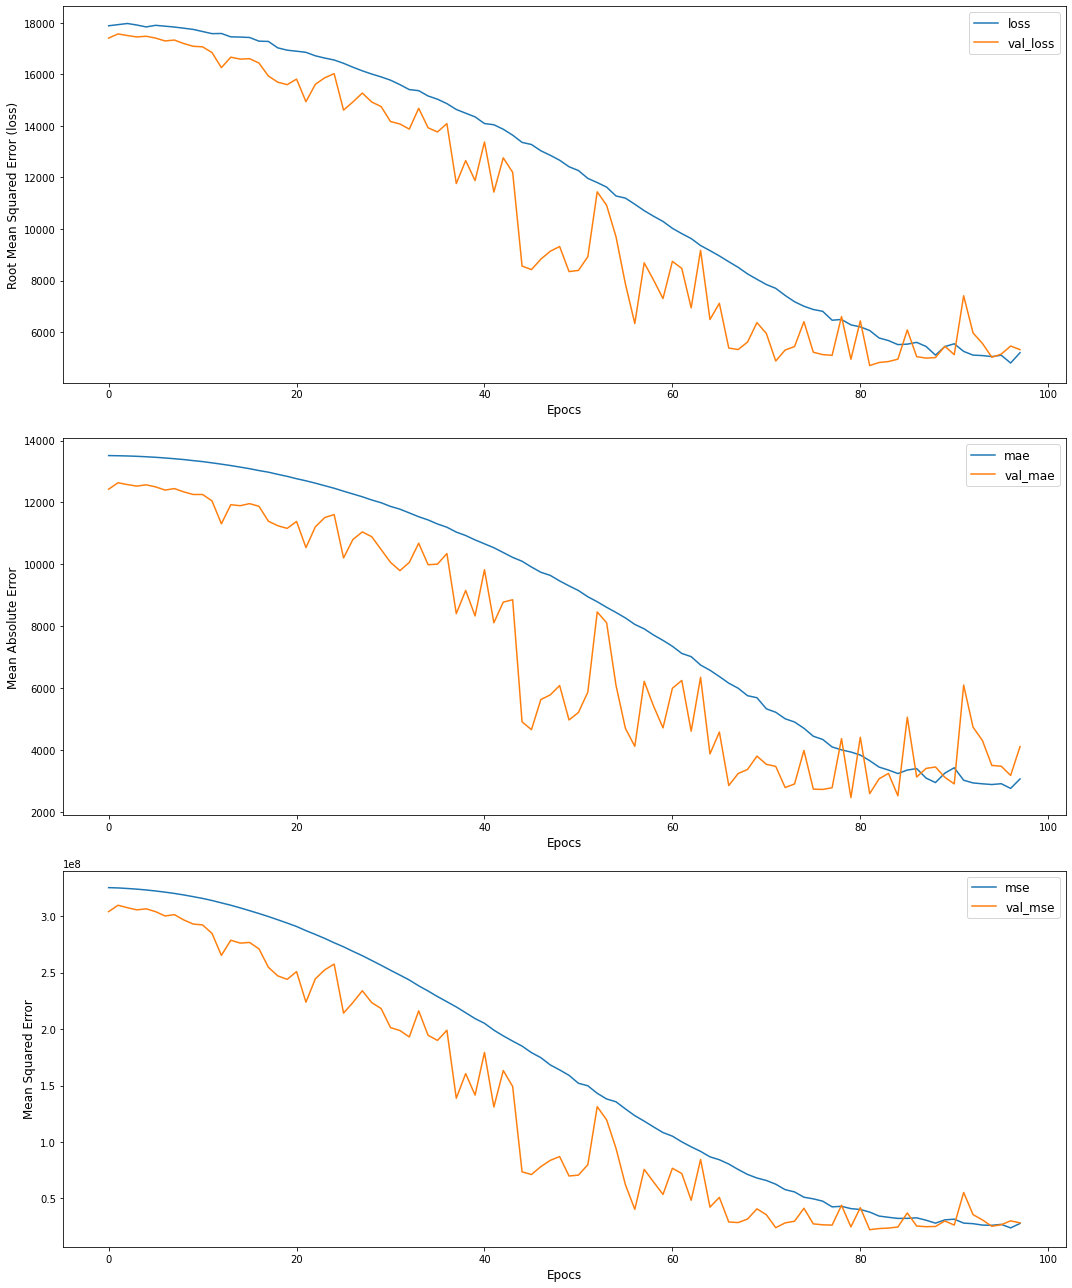

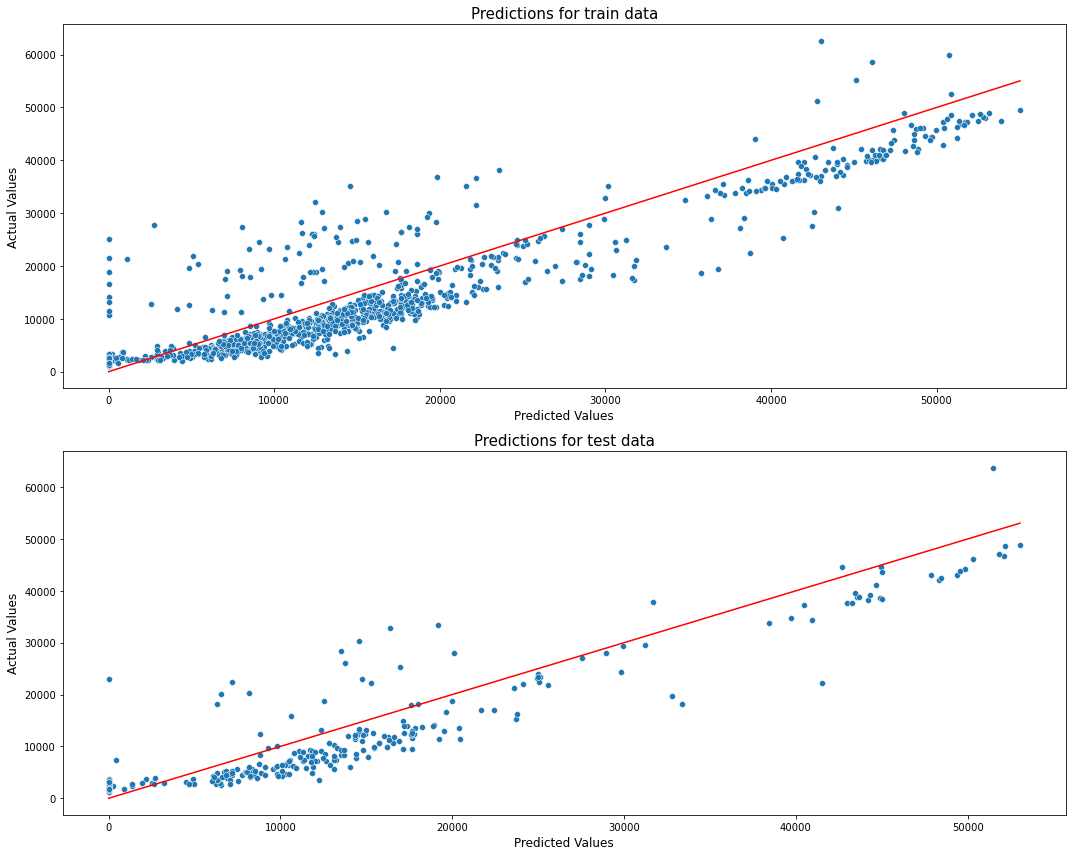

In [39]:
epoc_plots(history65)

y_pred65 = model65.predict(X_test)
print('r2 score = ', r2_score(y_test, y_pred65), '\n')

regression_plots(y_pred65, model65)

check_min_max(y_pred65)

In [40]:
# I honestly am uncertain how to feel about these models
# they are ok, but nothing seems to increase the r2 score
# and anything drastic that I try decreses the r2 score below 80
# let me try huge neuron count with few layers

In [41]:
set_seed()

In [42]:
# param count: 68,865 (+1,024)
model66 = Sequential() 

model66.add(Dense(256, input_dim=6))
model66.add(BatchNormalization())
model66.add(Activation(ELU()))

# model65.add(Dense(32))
# model65.add(BatchNormalization())
# model65.add(Activation(ELU()))

for _ in range(1):
    model66.add(Dense(256))
    model66.add(BatchNormalization())
    model66.add(Activation(ELU()))

model66.add(Dense(1, activation='relu'))

model66.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [43]:
history66 = model66.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=16))

Epoch 1/300
14/14 [==============================] - 0s 8ms/step - loss: 17886.3008 - mse: 325109888.0000 - mae: 13509.0166 - val_loss: 17269.4785 - val_mse: 299054688.0000 - val_mae: 12242.4531
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 17915.0430 - mse: 324292256.0000 - mae: 13489.1621 - val_loss: 17477.1797 - val_mse: 306281664.0000 - val_mae: 12523.1846
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17924.8750 - mse: 322581920.0000 - mae: 13463.9053 - val_loss: 17497.0586 - val_mse: 306961792.0000 - val_mae: 12575.7637
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17823.0508 - mse: 320480704.0000 - mae: 13422.7881 - val_loss: 17338.9707 - val_mse: 301436608.0000 - val_mae: 12440.9922
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17694.3730 - mse: 317797920.0000 - mae: 13368.6367 - val_loss: 17105.9570 - val_mse: 293396928.0000 - val_mae: 12191.7207
Epoch 6/300
14/14 [======

14/14 [==============================] - 0s 2ms/step - loss: 5762.2363 - mse: 33948304.0000 - mae: 3419.7505 - val_loss: 5674.2168 - val_mse: 32222322.0000 - val_mae: 3486.8748
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 5739.1597 - mse: 33582132.0000 - mae: 3457.5850 - val_loss: 5745.1909 - val_mse: 33023146.0000 - val_mae: 3473.1755
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 5708.8286 - mse: 34861144.0000 - mae: 3487.6467 - val_loss: 12861.6777 - val_mse: 166308512.0000 - val_mae: 10524.7715
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 5638.1631 - mse: 33275456.0000 - mae: 3490.3840 - val_loss: 13332.4990 - val_mse: 178296416.0000 - val_mae: 11809.5908
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 5548.0020 - mse: 32829536.0000 - mae: 3523.0046 - val_loss: 13941.1152 - val_mse: 194808944.0000 - val_mae: 12765.2129
Epoch 48/300
14/14 [==============================] - 

r2 score =  0.6826608940181087 

                     Actual     Predicted
Maximum Values  63770.42801  53771.144531
Minimum Values   1131.50660      0.000000


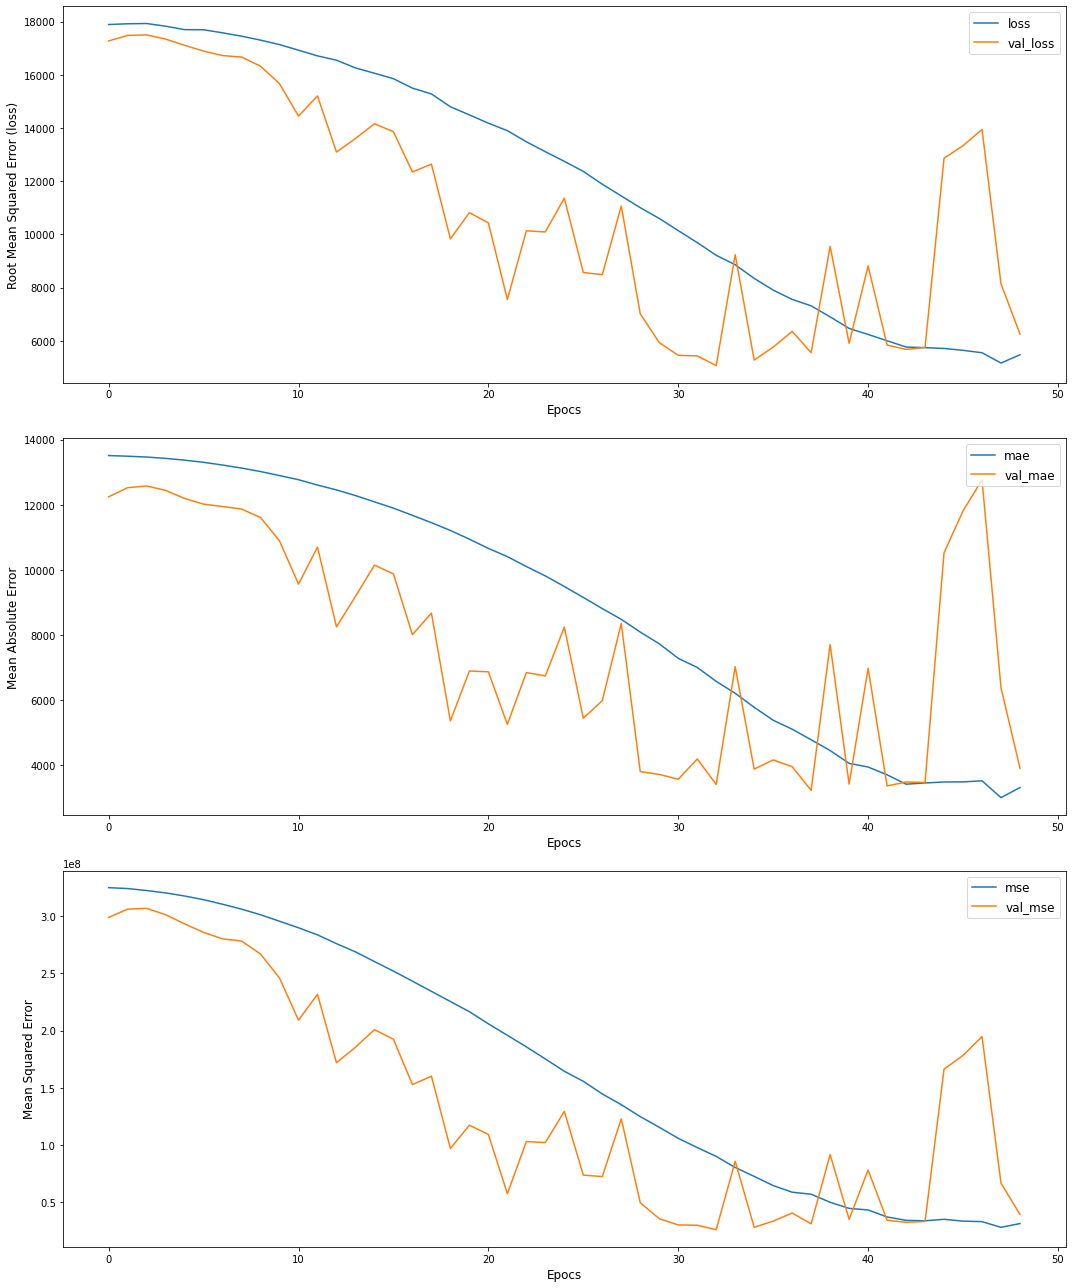

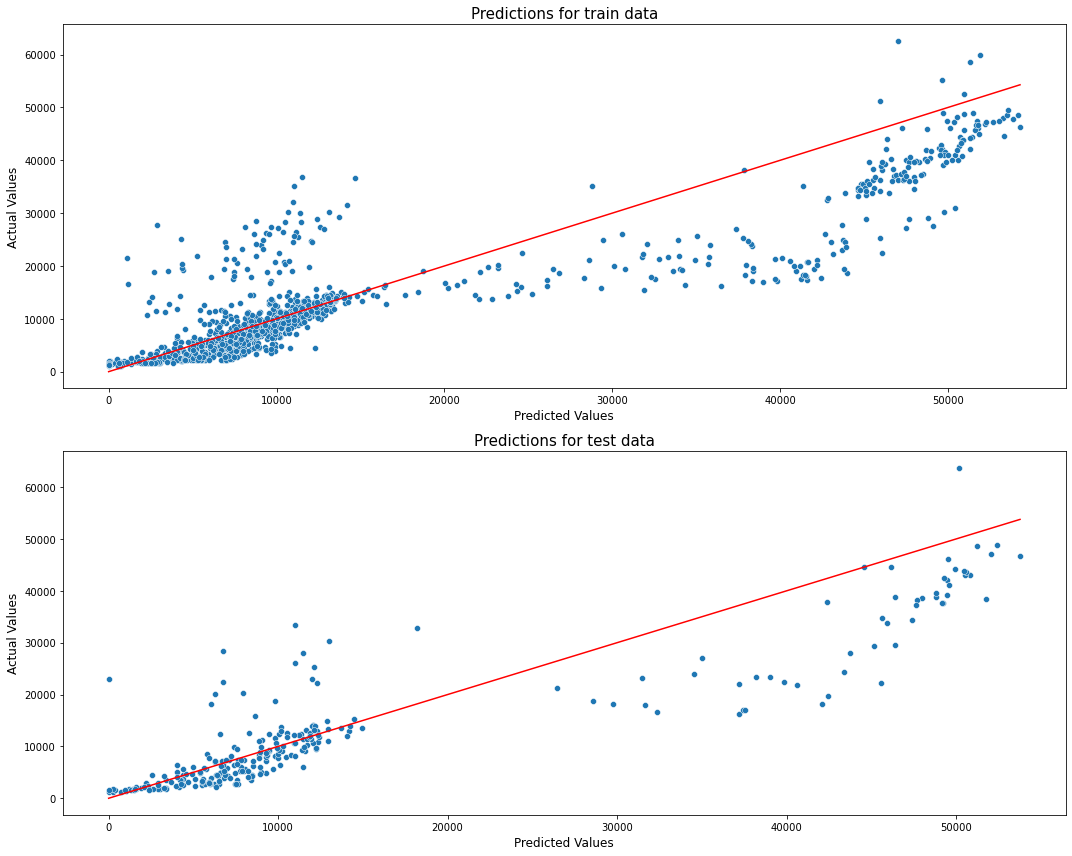

In [44]:
epoc_plots(history66)

y_pred66 = model66.predict(X_test)
print('r2 score = ', r2_score(y_test, y_pred66), '\n')

regression_plots(y_pred66, model66)

check_min_max(y_pred66)

In [45]:
# I had to decrease the learning rate for the model to learn slightly well
# but it performs bad for the param count

In [46]:
set_seed()

In [47]:
# param count: 18,049 (+512)
model67 = Sequential() 

model67.add(Dense(128, input_dim=6))
model67.add(BatchNormalization())
model67.add(Activation(ELU()))

# model65.add(Dense(32))
# model65.add(BatchNormalization())
# model65.add(Activation(ELU()))

for _ in range(1):
    model67.add(Dense(128))
    model67.add(BatchNormalization())
    model67.add(Activation(ELU()))

model67.add(Dense(1, activation='relu'))

model67.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [48]:
history67 = model67.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=16))

Epoch 1/300
14/14 [==============================] - 0s 8ms/step - loss: 17890.2324 - mse: 325256352.0000 - mae: 13512.1465 - val_loss: 17395.9141 - val_mse: 303440864.0000 - val_mae: 12410.0234
Epoch 2/300
14/14 [==============================] - 0s 1ms/step - loss: 17929.2832 - mse: 324804064.0000 - mae: 13500.3096 - val_loss: 17340.2695 - val_mse: 301507104.0000 - val_mae: 12339.6230
Epoch 3/300
14/14 [==============================] - 0s 1ms/step - loss: 17962.6602 - mse: 323933568.0000 - mae: 13486.2520 - val_loss: 17517.8359 - val_mse: 307702176.0000 - val_mae: 12586.4561
Epoch 4/300
14/14 [==============================] - 0s 1ms/step - loss: 17883.0742 - mse: 322626144.0000 - mae: 13465.0928 - val_loss: 17419.8164 - val_mse: 304263968.0000 - val_mae: 12495.2988
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17787.0020 - mse: 321096480.0000 - mae: 13433.8428 - val_loss: 17445.9746 - val_mse: 305168256.0000 - val_mae: 12546.5791
Epoch 6/300
14/14 [======

14/14 [==============================] - 0s 2ms/step - loss: 9614.8115 - mse: 93818216.0000 - mae: 6927.5605 - val_loss: 6042.4883 - val_mse: 36796992.0000 - val_mae: 3669.7021
Epoch 44/300
14/14 [==============================] - 0s 1ms/step - loss: 9258.4238 - mse: 88260968.0000 - mae: 6627.1807 - val_loss: 8026.7661 - val_mse: 64716532.0000 - val_mae: 6107.0503
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 8866.3945 - mse: 84225464.0000 - mae: 6338.9990 - val_loss: 5826.0137 - val_mse: 34069680.0000 - val_mae: 3998.8247
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 8686.1191 - mse: 77920808.0000 - mae: 5966.5200 - val_loss: 6283.1191 - val_mse: 39582340.0000 - val_mae: 5222.4224
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 8332.5645 - mse: 73144552.0000 - mae: 5651.0981 - val_loss: 7908.1904 - val_mse: 62647336.0000 - val_mae: 7033.2090
Epoch 48/300
14/14 [==============================] - 0s 2ms/st

r2 score =  0.7401594155356843 

                     Actual     Predicted
Maximum Values  63770.42801  56495.488281
Minimum Values   1131.50660      0.000000


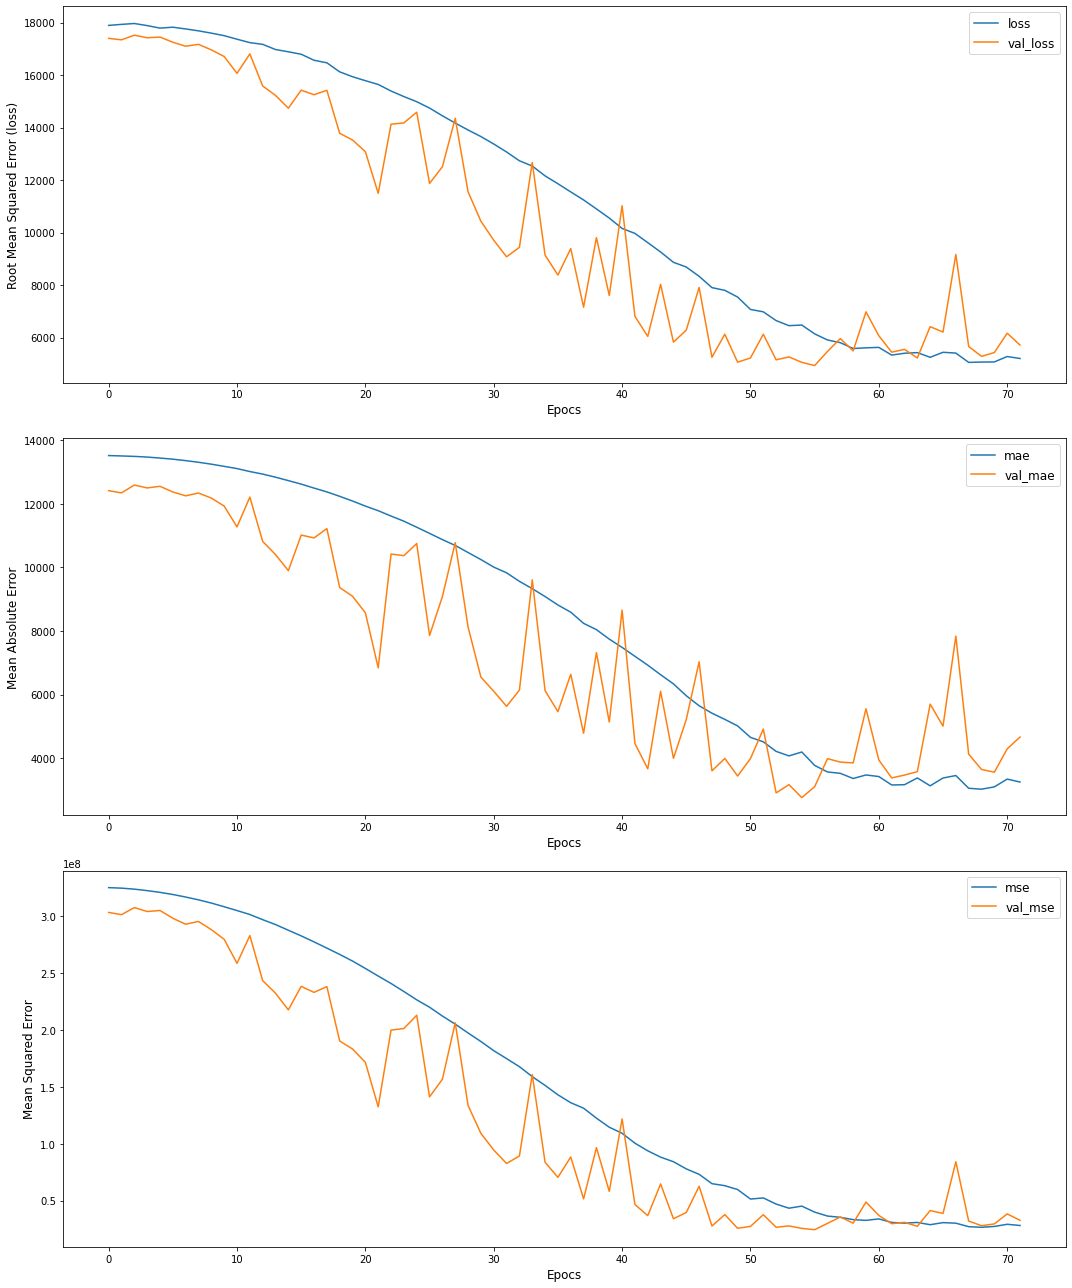

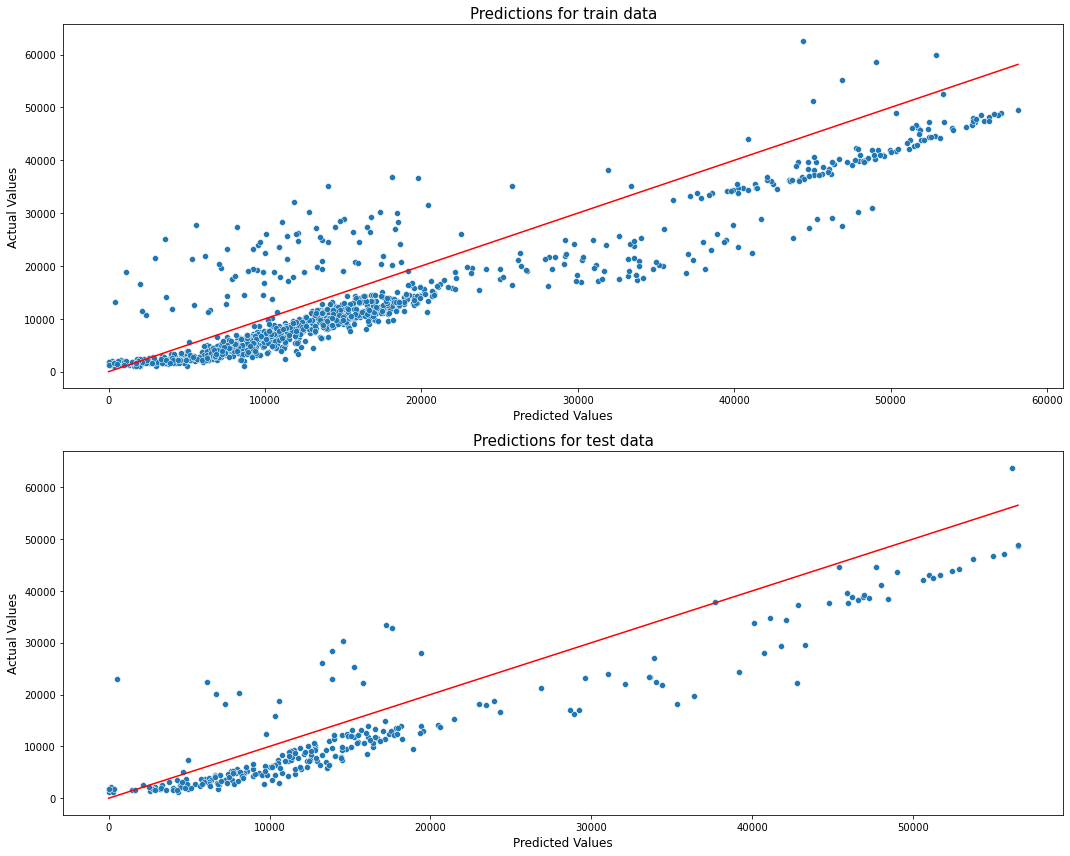

In [49]:
epoc_plots(history67)

y_pred67 = model67.predict(X_test)
print('r2 score = ', r2_score(y_test, y_pred67), '\n')

regression_plots(y_pred67, model67)

check_min_max(y_pred67)

In [50]:
# I don't know if its just the maths, or if I'm not in the zone today 
# but I, again, don't know how to feel about these results
# I feel like the set_seed is confusing me a lot
# because the same model gives me 0.5 and 0.75 r2 score depending on the sequence of running the model (read seed)
# and I don't know how to feel about that 